# Credit Card Users Churn Prediction


## Problem Statement


### Business Context

The  bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at  bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank (in months)
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance

##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.

##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1


## Importing necessary libraries


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl


**Note**: _After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again_.


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import DataConversionWarning
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier



from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings

warnings.filterwarnings(action="ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore")

from typing import Tuple, List
from IPython.display import display

pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 400
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


## Loading the dataset


In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_csv('/content/drive/MyDrive/Projects/Credit_Card_Churn/BankChurners.csv')
df = data.copy()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Overview



- Observations
- Sanity checks


In [ ]:
# display first and last few rows of data
pd.concat([df.head(10), df.tail(10)])

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.00,1247,2763.00,1.38,1088,24,0.85,0.31
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.00,2264,32252.00,1.98,1330,31,0.72,0.07
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.00,1396,27685.00,2.20,1538,36,0.71,0.05
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.00,2517,19835.00,3.35,1350,24,1.18,0.11
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.00,1677,9979.00,1.52,1441,32,0.88,0.14


In [ ]:
df.shape

(10127, 21)

**Observations:**

- The dataset contains 10127 rows, 21 data points


In [ ]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

**Observations**

- The dataset contains 10 int, 5 float, 6 categorical


In [ ]:
def analyze_missing_data(df):
        # percentage of null values
        null_summary = df.isnull().sum()
        null_percentage = (df.isnull().mean()) * 100

        # hold the summary
        summary_df = pd.DataFrame(
            {"Null Count": null_summary, "Null Percentage": null_percentage}
        )

        # missing values and sort by percentage
        summary_df = summary_df[summary_df["Null Count"] > 0].sort_values(
            by="Null Percentage", ascending=False
        )

        print(summary_df)


analyze_missing_data(df)


                 Null Count  Null Percentage
Education_Level        1519            15.00
Marital_Status          749             7.40


**Observations:**

- Education Level contains 1519 null values and Marital Status contains 749 null values


In [ ]:
df.duplicated().sum()

0

**Observations:**

- No Duplicates

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [ ]:
df.select_dtypes(include=['object']).describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10127,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


**Observations**

* Customer age ranges from 26 - 73. A broad distribution range

* Average credit card limit $8600, with average utilization of 27%

* Relationship period ranges from 13-56 months with 35 being the average.

* Total number of products between 1-6.

* There are 7 unique educational levels, with 'Graduate' being the most common.

* Most customers are married.

* Most customers make less than 40K.

* The blue card is the most popular.


## **Data Preprocessing**

####**Define Data Utility Class**

In [ ]:

class DataUtility:
    def __init__(self, df):
        self.df = df

    def drop_column(self, col):
        self.df.drop(col, axis=1, inplace=True, errors='ignore')

    def clean_column_names(self):
        self.df.columns = self.df.columns.str.lower().str.replace(' ', '_').str.strip()

    def find_unique_id_cols(self):
        unique_id_columns = self.df.columns[(self.df.nunique() == len(self.df)) & (~self.df.isnull().any())]
        return list(unique_id_columns)

    def convert_to_categorical(self, categorical_cols):
      for col in categorical_cols:
          if col in self.df.columns:
              self.df[col] = self.df[col].astype('category')
          else:
              print(f"Column '{col}' not found in DataFrame.")

    def analyze_categorical_cols(self, categorical_cols):
        category_analysis = {}
        for col in categorical_cols:
            if col in self.df.columns:
                count = self.df[col].value_counts()
                percentage = self.df[col].value_counts(normalize=True) * 100
                category_analysis[col] = pd.DataFrame({'Count': count, 'Percentage': percentage})

        insights = {}
        for col, analysis in category_analysis.items():
            insights[col] = analysis.apply(lambda x: f"{x.name}: {x['Count']} ({x['Percentage']:.2f}%)", axis=1).values

        for col, col_insights in insights.items():
            print(f"{col}:\n" + "\n".join(col_insights) + "\n")

    def analyze_numeric_cols(self, numeric_cols):
        for col in numeric_cols:
            if col in self.df.columns:
                mean_value = self.df[col].mean()
                median_value = self.df[col].median()
                min_value = self.df[col].min()
                max_value = self.df[col].max()
                std_dev = self.df[col].std()
                quartiles = self.df[col].quantile([0.25, 0.75])

                print(f"{col}")
                print(f"Mean: {mean_value:.2f}")
                print(f"Median: {median_value:.2f}")
                print(f"Range: {min_value} - {max_value}")
                print(f"Standard Deviation: {std_dev:.2f}")
                print(f"25th Percentile: {quartiles[0.25]}")
                print(f"75th Percentile: {quartiles[0.75]}\n")

    def analyze_discrete_columns(self, uniqueness_threshold=10):
        discrete_columns = []
        for column in self.df.columns:
            if pd.api.types.is_numeric_dtype(self.df[column]):
                if self.df[column].nunique() <= uniqueness_threshold:
                    discrete_columns.append(column)
        return discrete_columns

    def analyze_missing_data(self):
        # percentage of null values
        null_summary = self.dataframe.isnull().sum()
        null_percentage = (self.dataframe.isnull().mean()) * 100

        # hold the summary
        summary_df = pd.DataFrame(
            {"Null Count": null_summary, "Null Percentage": null_percentage}
        )

        # missing values and sort by percentage
        summary_df = summary_df[summary_df["Null Count"] > 0].sort_values(
            by="Null Percentage", ascending=False
        )

        print(summary_df)



In [ ]:
#instatiate the helper
datautil = DataUtility(df)

####**Clean Column Headers**

In [ ]:
datautil.clean_column_names()

####**Check Unique Values**

In [ ]:
df.nunique()

clientnum                   10127
attrition_flag                  2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 6
marital_status                  3
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
avg_open_to_buy              6813
total_amt_chng_q4_q1         1158
total_trans_amt              5033
total_trans_ct                126
total_ct_chng_q4_q1           830
avg_utilization_ratio         964
dtype: int64

**Observations:**

- There are 10127 unique values. We will drop clientnum as it is a unique identifier.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           8608 non-null   object 
 6   marital_status            9378 non-null   object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

Observation
* We have missing values for education_level and marital_status


####**Drop UID Column**

In [ ]:
# drop id column as this is a uid
datautil.drop_column('clientnum')

# select columns with object dtype
cols = df.select_dtypes(['object'])
cols.columns


Index(['attrition_flag', 'gender', 'education_level', 'marital_status',
       'income_category', 'card_category'],
      dtype='object')

In [ ]:
#  Fill missing values
df.fillna({'education_level': 'unknown', 'marital_status': 'unknown'}, inplace=True)

####**Type Conversion**

In [ ]:
df['attrition_flag'].replace('Existing Customer', 0, inplace=True)
df['attrition_flag'].replace('Attrited Customer', 1, inplace=True)

In [ ]:
# look at categorical
categorical_cols = cols.columns
categorical_cols

Index(['attrition_flag', 'gender', 'education_level', 'marital_status',
       'income_category', 'card_category'],
      dtype='object')

In [ ]:
# convert object to categorical
datautil.convert_to_categorical(cols.columns)


In [ ]:
# check for conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

Observation

* category(6), float64(5), int64(9)

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


**Questions**:
1. How is the total transaction amount distributed?
    * Total transactions are binomial distributed indicating two preferred ranges of transactions counts.

2. What is the distribution of the level of education of customers?
    * This column is nearly uniformly distributed, however, a considerable quantity of the data entries are missing.

3. What is the distribution of the level of income of customers?
    * The income distribution of customers has a slight left-skewed and pronounced mode, this indicates most incomes are concentrated around the mode.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
    * Active accounts have a more consitency in their transaction count while churned accounts higher variability.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

  * Both active and churned customers commonly have 3 months of inactivity, with active customers being more pronounced at this duration.

6. What are the attributes that have a strong correlation with each other?

    * months_on_book shows a positive correlation with customer_age, this indicates that as customer age increases, the duration of the account being open tends to increase.

    * total_revolving_bal has a positive correlation with the avg_utilization_ratio, indicating that customers with higher revolving balances tend to use a larger portion of their available credit.

    * negative correlations between credit_limit and avg_open_to_buy with avg_utilization_ratio indicate that as credit limit and available credit(open to buy) increase, customers with more credit available don't necessarily use it or carry it over which lowers the utilization rate.

    * total_trans_amt and total_trans_ct have a high positive correlation which suggests that customers with higher transaction amounts also tend to have a higher number of transactions.

    * total_amt_chng_q4_q1 and total_ct_chng_q4_q1 have a moderate positive correlation. This suggests that varaibility in transaction amounts from Q4 to Q1 are associated with varaibility in the number of transaction over the same period.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.


In [ ]:
def create_plots(data, col):
  min_val = data[col].min()
  max_val = data[col].max()
  q1 = data[col].quantile(0.25)
  q2 = data[col].quantile(0.50)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  mode_val = data[col].mode()[0]
  skewness = data[col].skew()
  data_range = max_val - min_val
  unique_count = data[col].nunique()
  non_missing_count = data[col].count()
  zeroes_count = (data[col] == 0).sum()

  stats_dict = {
      'Min': min_val, 'Max': max_val, 'Q1': q1, 'Q2': q2, 'Q3': q3,
      'IQR': iqr, 'Mode': mode_val, 'Skewness': skewness, 'Range': data_range,
      'Unique': unique_count, 'Non-Missing': non_missing_count,
      'Zeroes Count': zeroes_count
  }

  stats_df = pd.DataFrame(data=stats_dict, index=['Value'])
  display(stats_df)

  sns.set(style='whitegrid', palette='tab20')

  fig, axes = plt.subplots(2, 2, figsize=(16, 8), dpi=75)
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  # histplot
  sns.histplot(data[col], kde=True, color='purple', ax=axes[0, 0])
  axes[0, 0].axvline(data[col].mean(), color='purple', linestyle="--")
  axes[0, 0].axvline(data[col].median(), color='black', linestyle="-")
  axes[0, 0].set_title(f'{col.capitalize()} Frequency Distribution')

  # boxplot
  sns.boxplot(x=data[col], palette='Set2', width=0.7, linewidth=0.6, showmeans=True, ax=axes[1, 0])
  axes[1, 0].set_title(f'{col.capitalize()} Boxplot')

  # violinplot
  sns.violinplot(x=data[col], palette='tab20', split=False, ax=axes[0, 1])
  axes[0, 1].set_title(f'{col.capitalize()} Violinplot')

  # cumulative distribution
  sns.kdeplot(data[col], cumulative=True, palette='Pastel1', ax=axes[1, 1])
  axes[1, 1].set_title(f'{col.capitalize()} Cumulative Distribution')

  plt.show()


####**Numerical Univariate Plots**




 Customer_Age 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,26,73,41.00,46.00,52.00,11.00,44,-0.03,47,45,10127,0


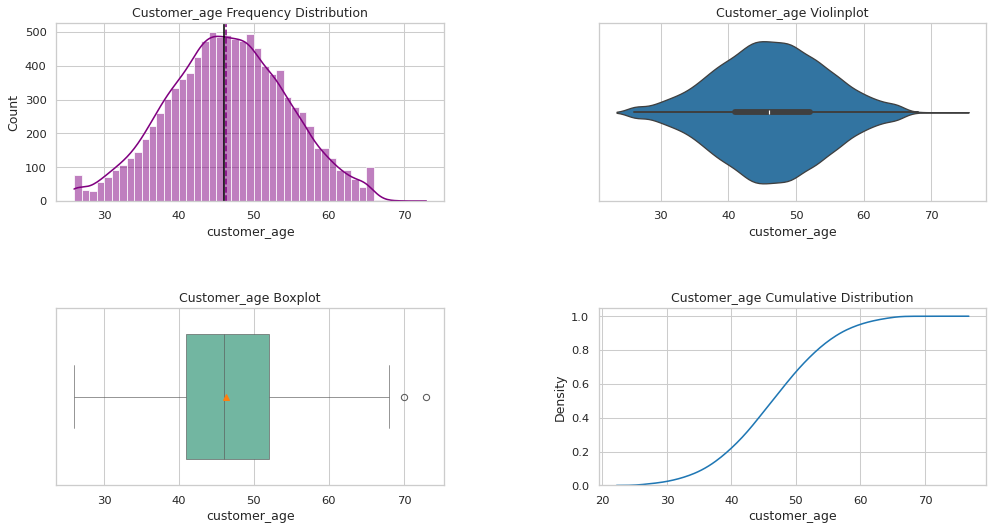




 Months_On_Book 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,13,56,31.00,36.00,40.00,9.00,36,-0.11,43,44,10127,0


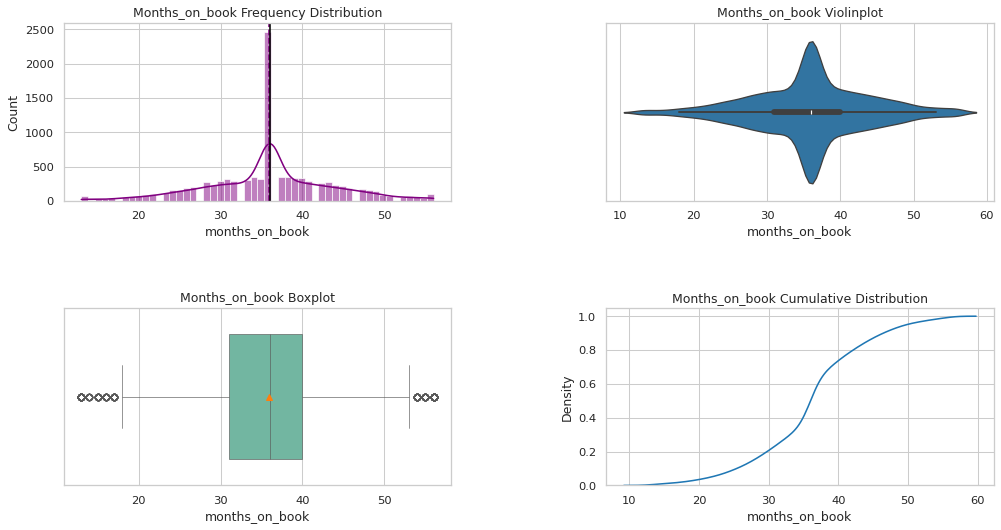




 Credit_Limit 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,1438.30,34516.00,2555.00,4549.00,11067.50,8512.50,34516.00,1.67,33077.70,6205,10127,0


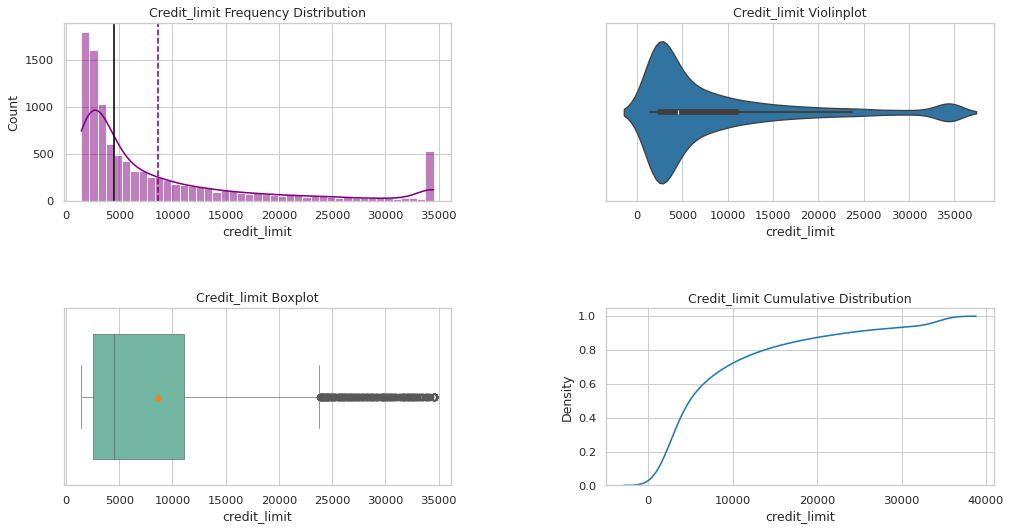




 Total_Revolving_Bal 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0,2517,359.00,1276.00,1784.00,1425.00,0,-0.15,2517,1974,10127,2470


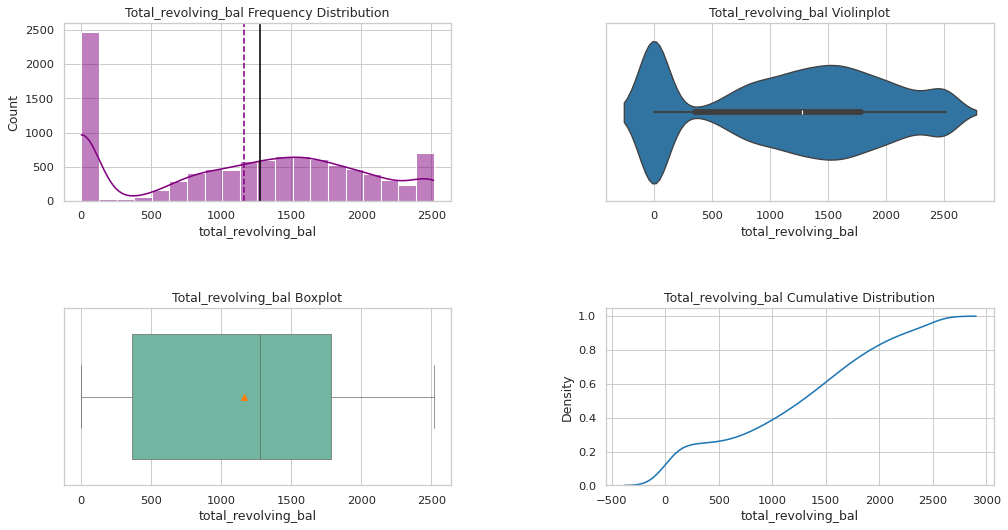




 Avg_Open_To_Buy 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,3.00,34516.00,1324.50,3474.00,9859.00,8534.50,1438.30,1.66,34513.00,6813,10127,0


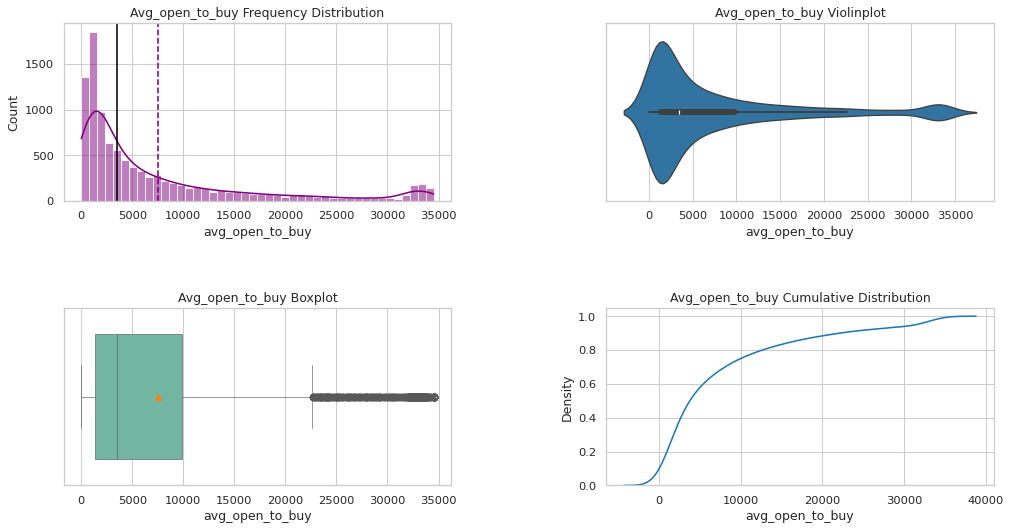




 Total_Amt_Chng_Q4_Q1 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0.00,3.40,0.63,0.74,0.86,0.23,0.79,1.73,3.40,1158,10127,5


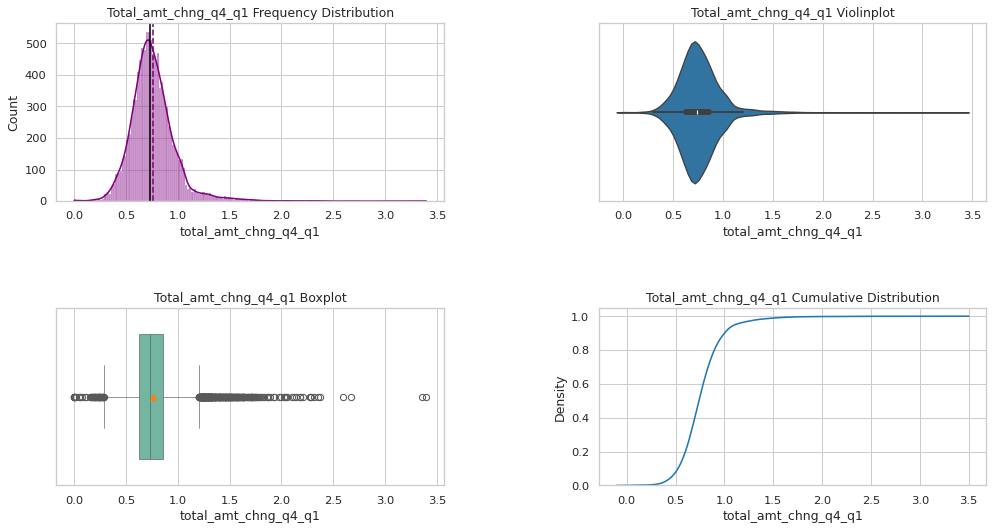




 Total_Trans_Amt 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,510,18484,2155.50,3899.00,4741.00,2585.50,4253,2.04,17974,5033,10127,0


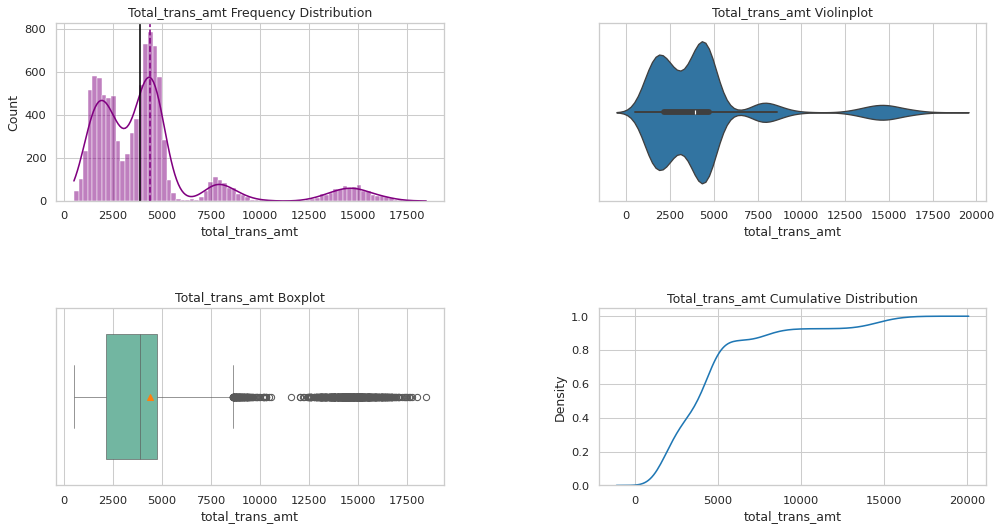




 Total_Trans_Ct 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,10,139,45.00,67.00,81.00,36.00,81,0.15,129,126,10127,0


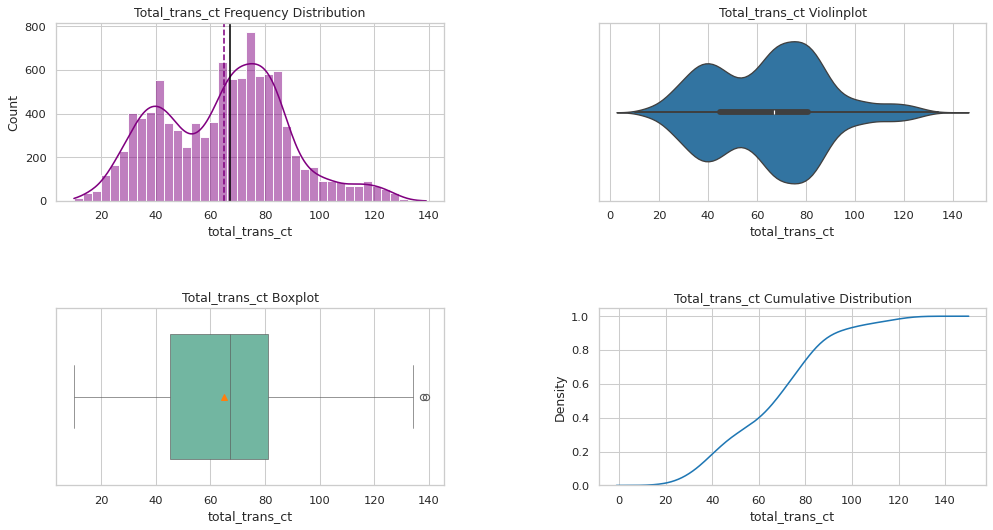




 Total_Ct_Chng_Q4_Q1 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0.00,3.71,0.58,0.70,0.82,0.24,0.67,2.06,3.71,830,10127,7


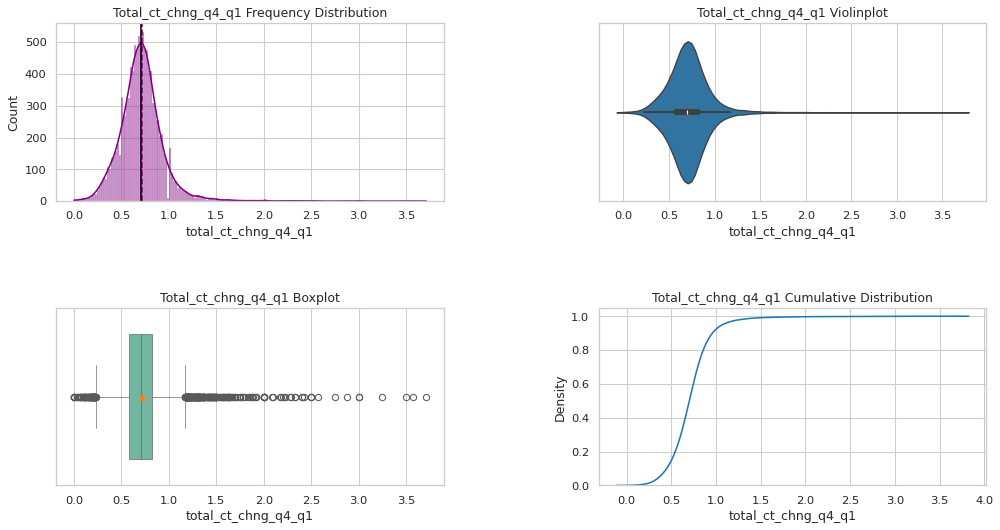




 Avg_Utilization_Ratio 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0.00,1.00,0.02,0.18,0.50,0.48,0.00,0.72,1.00,964,10127,2470


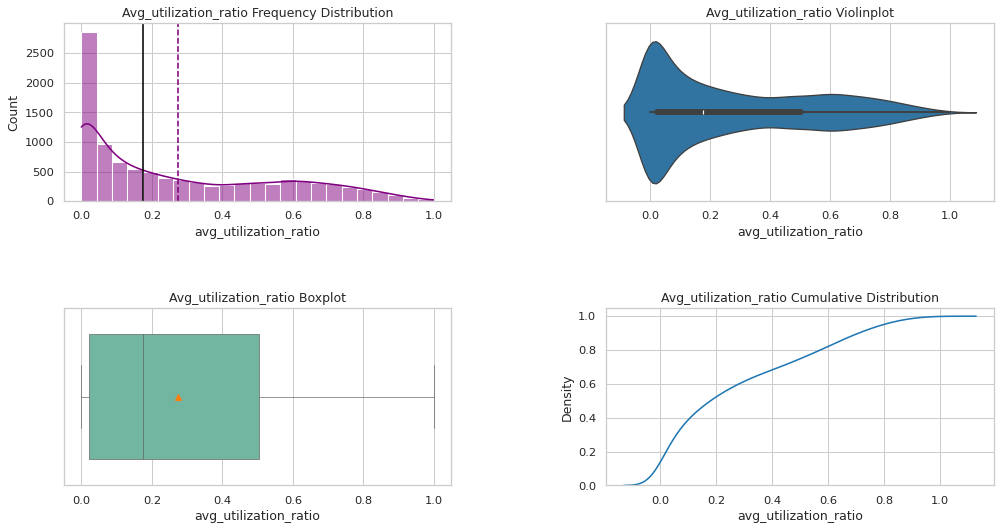

In [ ]:
# Show plots and statitics
for col in df.select_dtypes(include=np.number):
  print('\033[1m', col.title(),'\033[0m')
  create_plots(df, col)
  print('\n\n')

**Observations**
* Age: Age is close to normally distributed with a few outliers > 70
* Months on book: Customer tenure is concentrated between 30 - 40 months with few being long term or short term customers.

* Credit Limit: Distribution is right-skewed, with a majority of customers holding lower credit limits. There are outliers with large credit lines.

* Total_Revolving_Bal: Total revolving balance is close to zero indicating many customers carry low or no revolving balance

* Avg_Open_To_Buy: Average open to buy is right skewed with outliers. This indicates that a majority of customers have lower amounts of available spend while other have substantially higher amounts.

* Total_Trans_Amt: Total transaction amounts are right skewed indicating most transactions occuring at lower amounts.

* Total_Trans_Ct: Appear to be binomial distributed indicating there are two frequent transactions counts per customer.

* Total_Amt_Chng_Q4_Q1: This is roughly normally distributed with outliers suggesting some large quarterly changes in the spend amounts.

* Avg_Utilization_Ratio: Most customers do not use their available credit while others have much hugher utilization needs.



####**Categorical Univariate Plots**

In [ ]:
# categorical_cols = ['attrition_flag', 'gender', 'dependent_count', 'education_level',
#                     'marital_status', 'income_category', 'card_category','total_relationship_count',
#                     'months_inactive_12_mon',  'contacts_count_12_mon']

class CategoricalPlotter:
    def __init__(self, df):
        self.df = df
        self.categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

    def plot_categorical_subplots(self):
        n_cols = 2
        n_rows = (len(self.categorical_columns) + n_cols - 1) // n_cols  # Ceiling division to ensure enough rows

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8 * n_rows), dpi=75)
        fig.subplots_adjust(hspace=0.6, wspace=0.4)
        axes = axes.flatten()

        for i, col in enumerate(self.categorical_columns):
            ax = axes[i]
            sns.countplot(x=self.df[col], palette='Paired', ax=ax)
            ax.set_title(col)
            ax.tick_params(axis='x')

            total = len(self.df[col])  # total count for the column
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), # annotate the percantage
                            ha='center', va='bottom', size=10)

        # Deactivate remaining axes if any
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)  # More explicit than delaxes

        plt.tight_layout()
        plt.show()

In [ ]:
#instantiate the catplotter
catplotter = CategoricalPlotter(df)

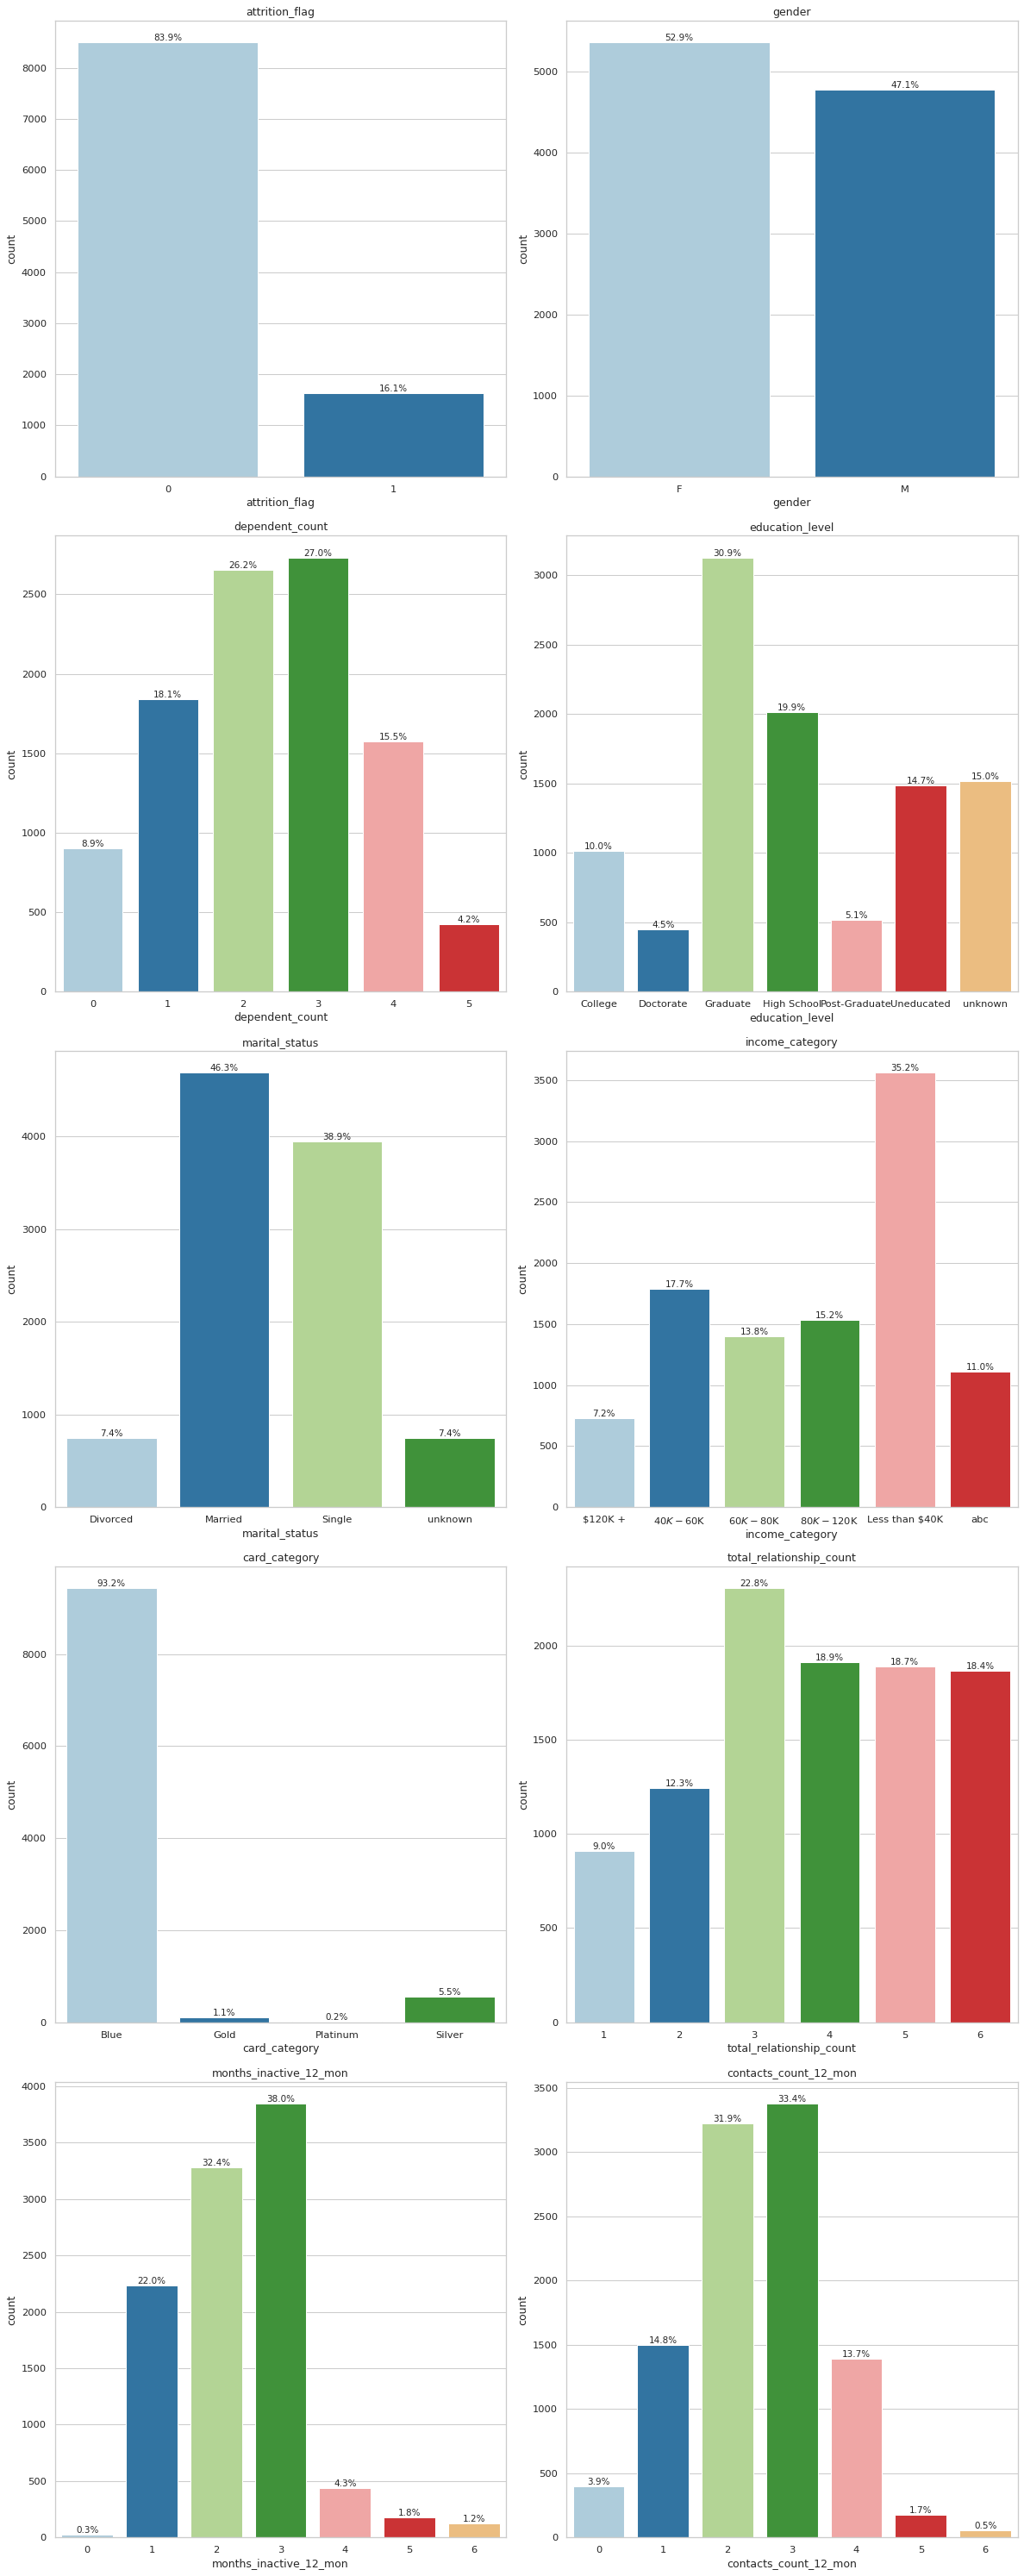

In [ ]:
#plot the categoricals
catplotter.plot_categorical_subplots()

**Observations**
* attrition_flag:a majority 84% of credit card customers are current customers.
* gender: There are slightly more female customers.
* dependent_count:~50% of customers have 2-3 dependents.
* education_level: The largest segment of customers have a greaduate degree.
* marital_status: Most customer are married.
* income_category: Customer with < $40k income are the largest segment.
* card_category: The blue card is the most frequent card type.
* total_relationship_count:Typically customer hold between 2-5 other banking products.
* months_inactive_12_mon: 32.4% have been inactive.
* contacts_count_12_mon: Most customers have been in contact with the bank 2-3 times in the past 12 months.

####**Bi-Variate Analysis**

In [2]:

def plot_compare_to_target(df, columns):

    for col in columns:
        print('\n')
        print('\n')
        print(col.title())

        # attrited_cust = df['attrition_flag'].map({0:'Existing Customer', 1:'Loan'})
        attrited_cust = df['attrition_flag']
        fig = plt.figure(figsize=(20, 10), dpi=75)

        gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

        # fig, axes = plt.subplots(2, 1, figsize=(16, 8), dpi=75)
        fig.subplots_adjust(hspace=0.6, wspace=0.6)

        ax_violin = fig.add_subplot(gs[0, 0])
        ax_bar = fig.add_subplot(gs[0, 1])
        ax_stacked = fig.add_subplot(gs[1, :])

        sns.set(style='whitegrid')

        # bar
        sns.barplot(x=attrited_cust, y=df[col], ax=ax_bar,  palette='plasma')
        ax_bar.set_title(f'Attrited vs {col.title()}')

        # violin.
        sns.violinplot(x=df[col], y=attrited_cust, palette='tab20', split=False, ax=ax_violin)
        ax_violin.set_title(f'Attrited vs {col.title()}')

        # hist
        sns.histplot(data=df, x=df[col], hue='attrition_flag', multiple='stack', kde=True, palette='icefire',label='Loan', common_bins=True, ax=ax_stacked, legend=True)
        ax_stacked.set_title(f'Attrited vs {col.title()}')

        print('\n')
        fig.tight_layout()
        plt.show()



def plot_influence_on_attrition(df, attrition_column='att', columns=None, figsize=(15, 10), cmap='gist_heat'):

    if columns is None:
        columns = [col for col in df.columns if col != attrition_column]
    columns = [col for col in df.columns if col != attrition_column]
    grouped_data = df.groupby(attrition_column)[columns].mean()
    grouped_data.plot(kind='bar', figsize=figsize, cmap=cmap)

    plt.title("Influence of Each Column on Attrition")
    plt.xlabel('Attrition')
    plt.ylabel('Average')
    plt.show()

def plot_distribution(data, x_column, hue_column):
        sns.displot(
        data=data,
        x=x_column,
        hue=hue_column,
        kind='kde'
    )

In [ ]:
#generate plots to compare against attritio
columns_to_compare = ['attrition_flag', 'gender', 'dependent_count', 'education_level', 'marital_status', 'income_category', 'card_category', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon']
plot_compare_to_target(data, columns_to_compare)


####**Multi-Variate Analysis**

#####**Plot Functions**

In [ ]:
def plot_correlation_matrix():
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='Spectral', annot=True, mask=mask, linewidths=0, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix')
    plt.show()

def plot_pairs(df):
    plt.figure(figsize=(10,10), dpi=75)
    sns.set(palette='coolwarm')
    sns.pairplot(df, hue='attrition_flag', markers=['o', 's', 'D'], corner=True)
    plt.title('Pair Plot')
    plt.show()

def plot_boxplots(df, cols):
    sns.set(style='white', palette='coolwarm')

    num_plots = len(cols)
    num_cols = 4
    num_rows = -(-num_plots // num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    for i, variable in enumerate(cols):
        ax = axes[i]
        sns.boxplot(x='attrition_flag', y=variable, data=df, palette='PuBu', showmeans=True, ax=ax)
        ax.set_title(f'Attrition vs {variable}')

    for j in range(i + 1, num_rows * num_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()




```
# This is formatted as code
```

#####**Correlation Matrix**

In [ ]:
# plot_correlation_matrix()

In [ ]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,0,40,F,4,High School,unknown,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


**Observations**

* months_on_book shows a positive correlation with customer_age, this indicates that as customer age increases, the duration of the account being open tends to increase.

* total_revolving_bal has a positive correlation with the avg_utilization_ratio, indicating that customers with higher revolving balances tend to use a larger portion of their available credit.

* negative correlations between credit_limit and avg_open_to_buy with avg_utilization_ratio indicate that as credit limit and available credit(open to buy) increase, customers with more credit available don't necessarily use it or carry it over which lowers the utilization rate.

* total_trans_amt and total_trans_ct have a high positive correlation which suggests that customers with higher transaction amounts also tend to have a higher number of transactions.

* total_amt_chng_q4_q1 and total_ct_chng_q4_q1 have a moderate positive correlation. This suggests that varaibility in transaction amounts from Q4 to Q1 are associated with varaibility in the number of transaction over the same period.

*

#####**Pair Plot**


In [ ]:
#Plot Pairs
plot_pairs(df)



Output hidden; open in https://colab.research.google.com to view.

##**Outlier Detection**

####**Define Outlier Functions**


In [ ]:
def plot_outliers_boxplots(df):

    num_data = df.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(15, 12))

    for i, variable in enumerate(num_data):
        plt.subplot(4, 4, i + 1)
        plt.boxplot(df[variable], whis=1.5)
        plt.title(variable)

    plt.tight_layout()
    plt.show()

def iqr_bounds(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def outlier_percentages(df):
    outlier_results = []
    num_data = df.select_dtypes(include=['float64', 'int64'])

    for column in num_data.columns:
        Q1 = num_data[column].quantile(0.25)
        Q3 = num_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the percentage of outliers
        outliers = (num_data[column] < lower_bound) | (num_data[column] > upper_bound)
        outlier_percentage = outliers.sum() / len(num_data) * 100
        outlier_results.append({'Column': column, 'Outlier Percentage': outlier_percentage, 'Lower Bound':lower_bound, 'Upper Bound':upper_bound})


    outlier_frame = pd.DataFrame(outlier_results).sort_values(by='Outlier Percentage', ascending=False)

    return outlier_frame

####**Plot Outliers**

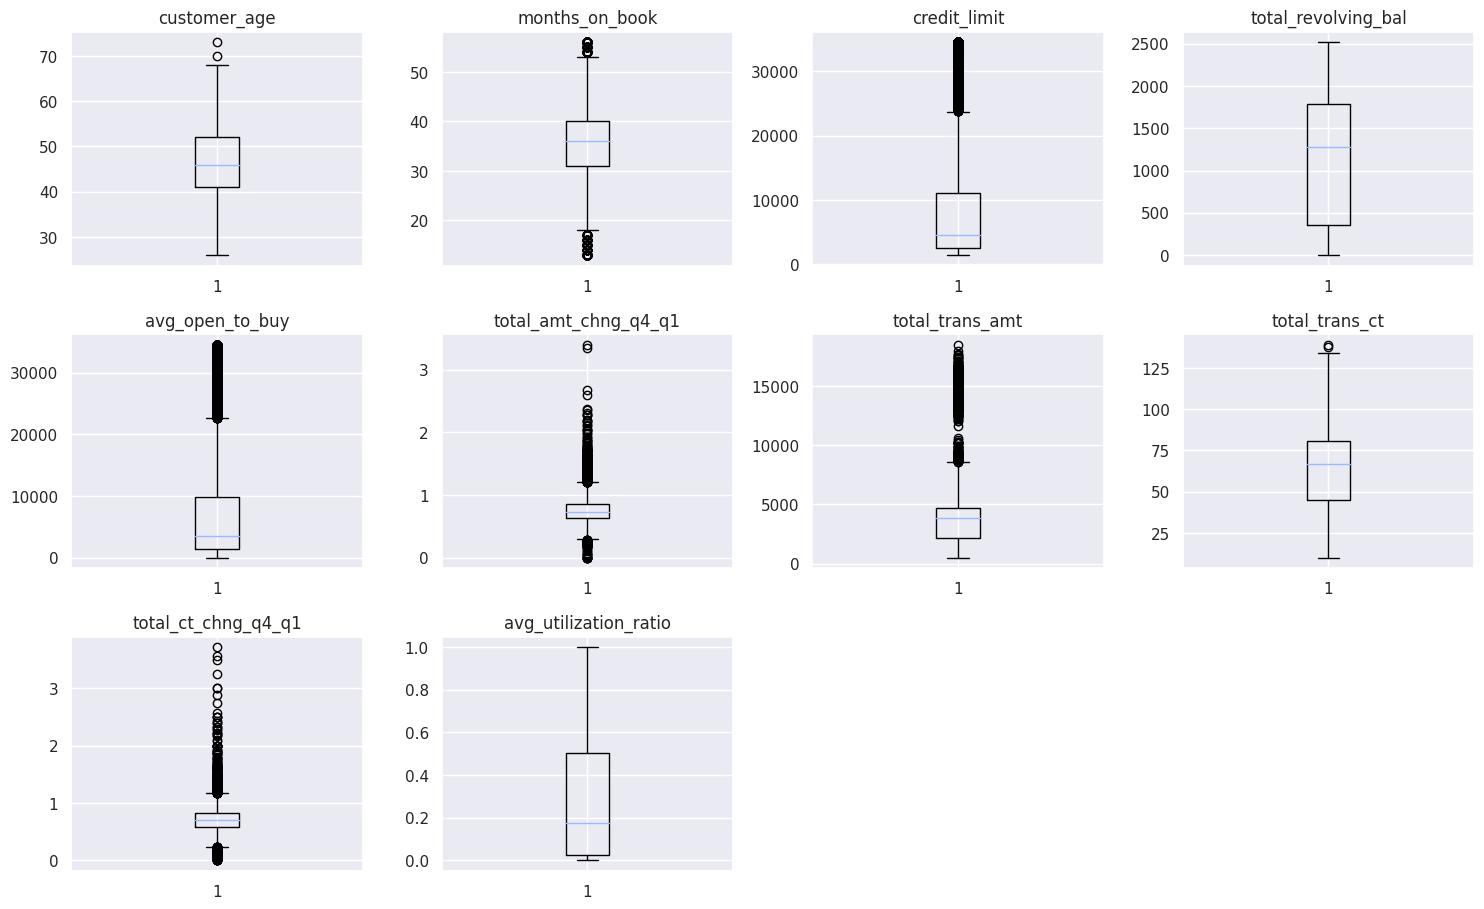

In [ ]:
plot_outliers_boxplots(df)

####**Percentage Outliers**

In [ ]:
outlier_table = outlier_percentages(df)
print(outlier_table)

                  Column  Outlier Percentage  Lower Bound  Upper Bound
2           credit_limit                9.72    -10213.75     23836.25
4        avg_open_to_buy                9.51    -11477.25     22660.75
6        total_trans_amt                8.85     -1722.75      8619.25
5   total_amt_chng_q4_q1                3.91         0.29         1.20
8    total_ct_chng_q4_q1                3.89         0.23         1.17
1         months_on_book                3.81        17.50        53.50
0           customer_age                0.02        24.50        68.50
7         total_trans_ct                0.02        -9.00       135.00
3    total_revolving_bal                0.00     -1778.50      3921.50
9  avg_utilization_ratio                0.00        -0.70         1.22


**Observations**
No outliers will be treated as these are valid data points that should be considered in the model.

## **Preprocessing**

####**Missing and Unique Values**



In [ ]:
def print_unique_values(df):
    cols_cat = df.select_dtypes(['category'])
    for i in cols_cat.columns:
        print(f'Unique values for: ', i,'\n')
        print(cols_cat[i].value_counts())
        print("-" * 50, '\n')

In [ ]:
print_unique_values(df)

**Observations**
* 'education_level','marital_status', 'income_category' have anomilious or missing values

####**Missing Value Treatment**

In [ ]:
##convert anomilies to nan
df['income_category'].replace('abc', np.nan, inplace=True)
df['marital_status'].replace('unknown', np.nan, inplace=True)
df['education_level'].replace('unknown', np.nan, inplace=True)

In [ ]:
# run check
df['income_category'].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: income_category, dtype: int64

In [ ]:
df['marital_status'].value_counts(dropna=False)

Married     4687
Single      3943
NaN          749
Divorced     748
Name: marital_status, dtype: int64

In [ ]:
df['education_level'].value_counts(dropna=False)

Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

###**Train-Test-Split**



In [ ]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [ ]:
# create copy as a check point to come back to
df_model = df.copy()

In [ ]:
# seperationg features and target column
X = df_model.drop(['attrition_flag'], axis=1)
y = df_model['attrition_flag']

In [ ]:
# split the data into training 80% and a temp set 20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


- We have 6075 observations in the train set, 2026 in the validation set, and

---

2026 in test and 19 columns.

### **Missing Value Imputation**

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           8608 non-null   category
 5   marital_status            9378 non-null   category
 6   income_category           9015 non-null   category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

reqd_cols_for_impute = X_train.select_dtypes(include="category").columns.tolist()

df_model[reqd_cols_for_impute].head()

,gender,education_level,marital_status,income_category,card_category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,NaN,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [ ]:
# fit and transform the train data
X_train[reqd_cols_for_impute] = imputer.fit_transform(X_train[reqd_cols_for_impute])

# # transform the validation data
X_val[reqd_cols_for_impute]  =  imputer.transform(X_val[reqd_cols_for_impute])

# # transform the test data
X_test[reqd_cols_for_impute] = imputer.transform(X_test[reqd_cols_for_impute])


In [ ]:
#check for null values
def print_null_values(*dataframes):
    for i, dframe in enumerate(dataframes, start=1):
        print(f"DataFrame {i} Null Value Counts:")
        print(dframe.isna().sum())
        print('-' * 40)

In [ ]:
print_null_values(X_train, X_val, X_test)

DataFrame 1 Null Value Counts:
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64
----------------------------------------
DataFrame 2 Null Value Counts:
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count

In [ ]:
cols_train = X_train.select_dtypes(include=['object', 'category'])
for i in cols_train.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

cols_val = X_val.select_dtypes(include=['object', 'category'])
for i in cols_val.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

cols_test = X_test.select_dtypes(include=['object', 'category'])
for i in cols_test.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

* All missing values have been treated.

1.   List item
2.   List item



###**Encoding Categorical Values**


In [ ]:
def create_dummies(X_train, X_val, X_test):
    # convert training data to dummies
    X_train_dummies = pd.get_dummies(X_train, drop_first=True)

    # convert validation and test data to dummies
    X_val_dummies = pd.get_dummies(X_val, drop_first=True)
    X_test_dummies = pd.get_dummies(X_test, drop_first=True)

    print(X_train_dummies.shape, X_val_dummies.shape, X_test_dummies.shape)

    return X_train_dummies, X_val_dummies, X_test_dummies

In [ ]:
X_train, X_val, X_test = create_dummies(X_train, X_val, X_test)

(6075, 29) (2026, 29) (2026, 29)


In [ ]:
X_train.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,marital_status_Married,marital_status_Single,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,card_category_Gold,card_category_Platinum,card_category_Silver
800,40,2,21,6,4,3,20056.00,1602,18454.00,0.47,1687,46,0.53,0.08,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44,1,34,6,2,0,2885.00,1895,990.00,0.39,1366,31,0.63,0.66,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48,4,36,5,1,2,6798.00,2517,4281.00,0.87,4327,79,0.88,0.37,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41,2,36,6,2,0,27000.00,0,27000.00,0.61,1209,39,0.30,0.00,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46,4,36,2,2,3,15034.00,1356,13678.00,0.75,7737,84,0.75,0.09,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


* After encoding there are 29 columns?


## Model Building


### Model evaluation criterion


#### Model can make wrong prediction

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites


The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

- We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
- We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
- We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc,
         "Recall": recall,
         "Precision": precision,
         "F1": f1},
        index=[0],
    )

    return df_perf

In [ ]:
def make_confusion_matrix(model, y_actual, nrows=3, ncols=2, labels=[1, 0]):

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
    axes = axes.flatten()

    for i, (name, model) in enumerate(models):

      y_predict = model.predict(X_test)

      cm=metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])

      df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"], columns=['Predicted - No', 'Predicted - Yes'])

      group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
      group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

      labels = np.asarray([["{0:0.0f}\n{1:.2%}".format(item, item/cm.sum()) for item in row] for row in cm])

      sns.heatmap(df_cm, annot=labels, fmt='', ax=axes[i], cmap='Blues')
      axes[i].set_title(f'{name} Confusion Matrix')
      axes[i].set_xlabel('Predicted labels')
      axes[i].set_ylabel('True labels')


    # Hide any unused subplots
    for j in range(i+1, nrows*ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):

    # model : classifier to predict values of X
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train,y_train))
        print("Accuracy on test set : ", model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

### Model Building with original data


Sample code for model building with original data


In [ ]:

def evaluate_models(models, X_train, y_train, X_val, y_val, X_test, y_test):
    performance_metrics = []

    for name, model in models:
        # Cross-validation strategy
        scoring = 'recall'
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

        # Perform cross-validation
        cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
        cval_train = cv_result.mean()

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)

        # Calculate recall scores
        recall_train = recall_score(y_train, y_pred_train)
        recall_val = recall_score(y_val, y_pred_val)
        recall_test = recall_score(y_test, y_pred_test)

        # Calculate the difference in recall between test and validation sets
        difference = recall_test - recall_val

        # Append performance metrics for the model
        performance_metrics.append({
            'Model': name,
            "CV Train Recall": cval_train,
            'Training Recall': recall_train,
            'Test Recall': recall_test,
            'Validation Recall': recall_val,
            'Recall Diff: Test-Val': difference
        })

    # Convert to DataFrame for easier viewing
    return pd.DataFrame(performance_metrics).sort_values(by=['CV Train Recall', 'Recall Diff: Test-Val'], ascending=[False, True])



In [ ]:
#Original
models_og = [
    ('Bagging_og', BaggingClassifier(random_state=1)),
    ('Random Forest_og', RandomForestClassifier(random_state=1)),
    ('AdaBoost_og', AdaBoostClassifier(random_state=1)),
    ('GBM_og', GradientBoostingClassifier(random_state=1)),
    ('Decision Tree_og', DecisionTreeClassifier(random_state=1)),
    ('XGBoost_og', XGBClassifier(random_state=1, eval_metric='logloss'))
]
metrics_df_original = evaluate_models(models_og, X_train, y_train, X_val, y_val, X_test, y_test)
print("\nModel Performance Summary (Original):")
metrics_df_original



Model Performance Summary (Original):


,Model,CV Train Recall,Training Recall,Test Recall,Validation Recall,Recall Diff: Test-Val
5,XGBoost_og,0.86,1.00,0.93,0.90,0.03
3,GBM_og,0.82,0.88,0.89,0.86,0.03
2,AdaBoost_og,0.81,0.83,0.89,0.85,0.04
0,Bagging_og,0.79,0.99,0.86,0.81,0.05
4,Decision Tree_og,0.78,1.00,0.83,0.82,0.01
1,Random Forest_og,0.77,1.00,0.79,0.80,-0.00


* Observations

 - XGBoost shows the best validation recall, outperforming other models. However, the perfect training recall points to potentially overfitting.

 - Gradient Boosting and AdaBoost are the 2nd and 3rd best.

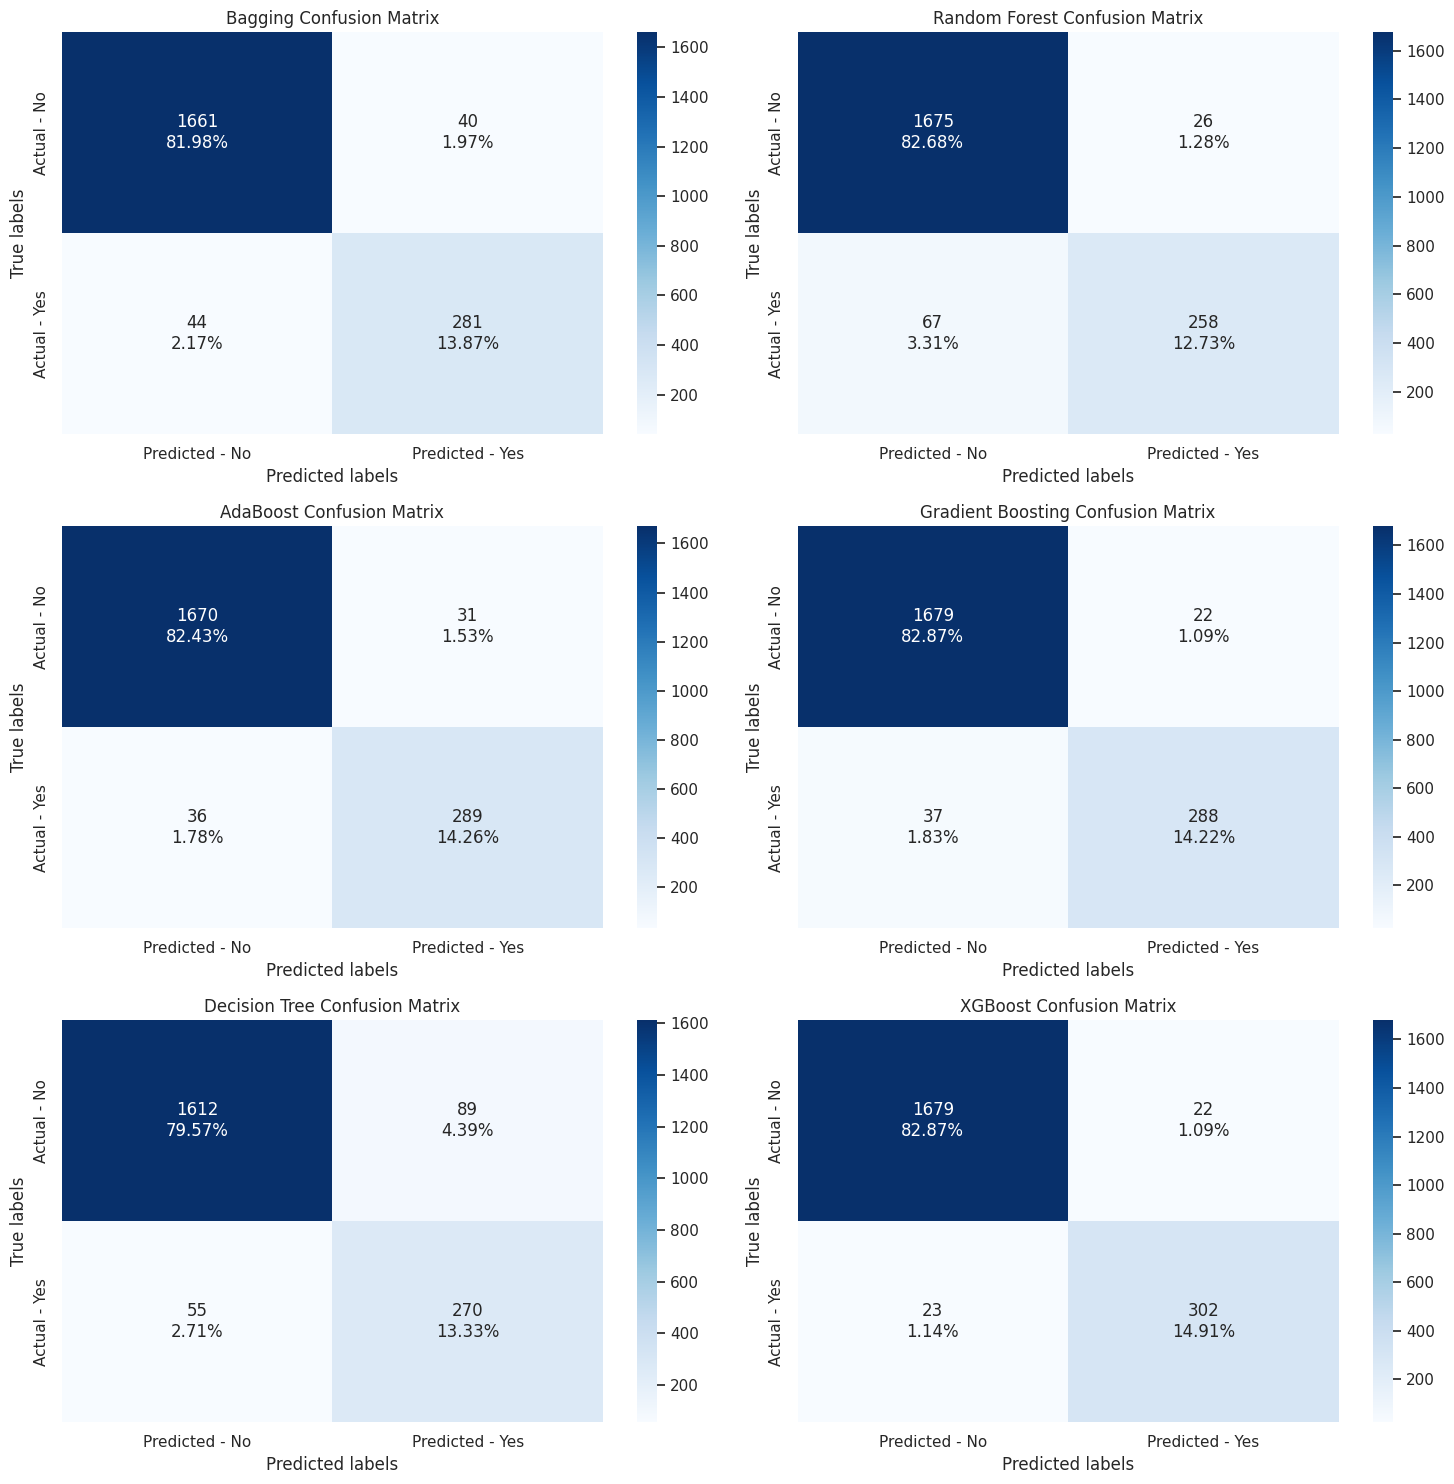

In [ ]:
make_confusion_matrix(models_og, y_test)

**Observations**


  Bagging: The model correctly identifying 82% of the actual negative cases.

  Random Forest: Has a relatively low false positive rate, with a very small % were incorrectly predicted as positive.

  AdaBoost: Had lowest positive cases being incorrectly predicted.

  GBM: Has a the lowest false positive rate.

  Decision Tree: Higher false positive, incorrectly predicted more negative cases as positive.
  
  XGBoost: Similiar precision as GMB

### Model Building with Oversampled data


In [ ]:
# Fit SMOTE on train data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
#Oversampled
models_os = [
    ('Bagging_os', BaggingClassifier(random_state=1)),
    ('RForest_os', RandomForestClassifier(random_state=1)),
    ('AdaBoost_os', AdaBoostClassifier(random_state=1)),
    ('GBM_os', GradientBoostingClassifier(random_state=1)),
    ('DTree_os', DecisionTreeClassifier(random_state=1)),
    ('XGBoost_os', XGBClassifier(random_state=1, eval_metric='logloss'))
]

metrics_df_oversampled = evaluate_models(models_os, X_train_over, y_train_over, X_val, y_val, X_test, y_test)
print("\nModel Performance Summary (Oversampled):")
metrics_df_oversampled


Model Performance Summary (Oversampled):


,Model,CV Train Recall,Training Recall,Test Recall,Validation Recall,Recall Diff: Test-Val
5,XGBoost_os,0.98,1.00,0.95,0.91,0.04
1,RForest_os,0.98,1.00,0.89,0.87,0.02
3,GBM_os,0.97,0.98,0.94,0.89,0.05
0,Bagging_os,0.97,1.00,0.89,0.85,0.04
2,AdaBoost_os,0.96,0.97,0.92,0.90,0.02
4,DTree_os,0.95,1.00,0.83,0.83,0.01


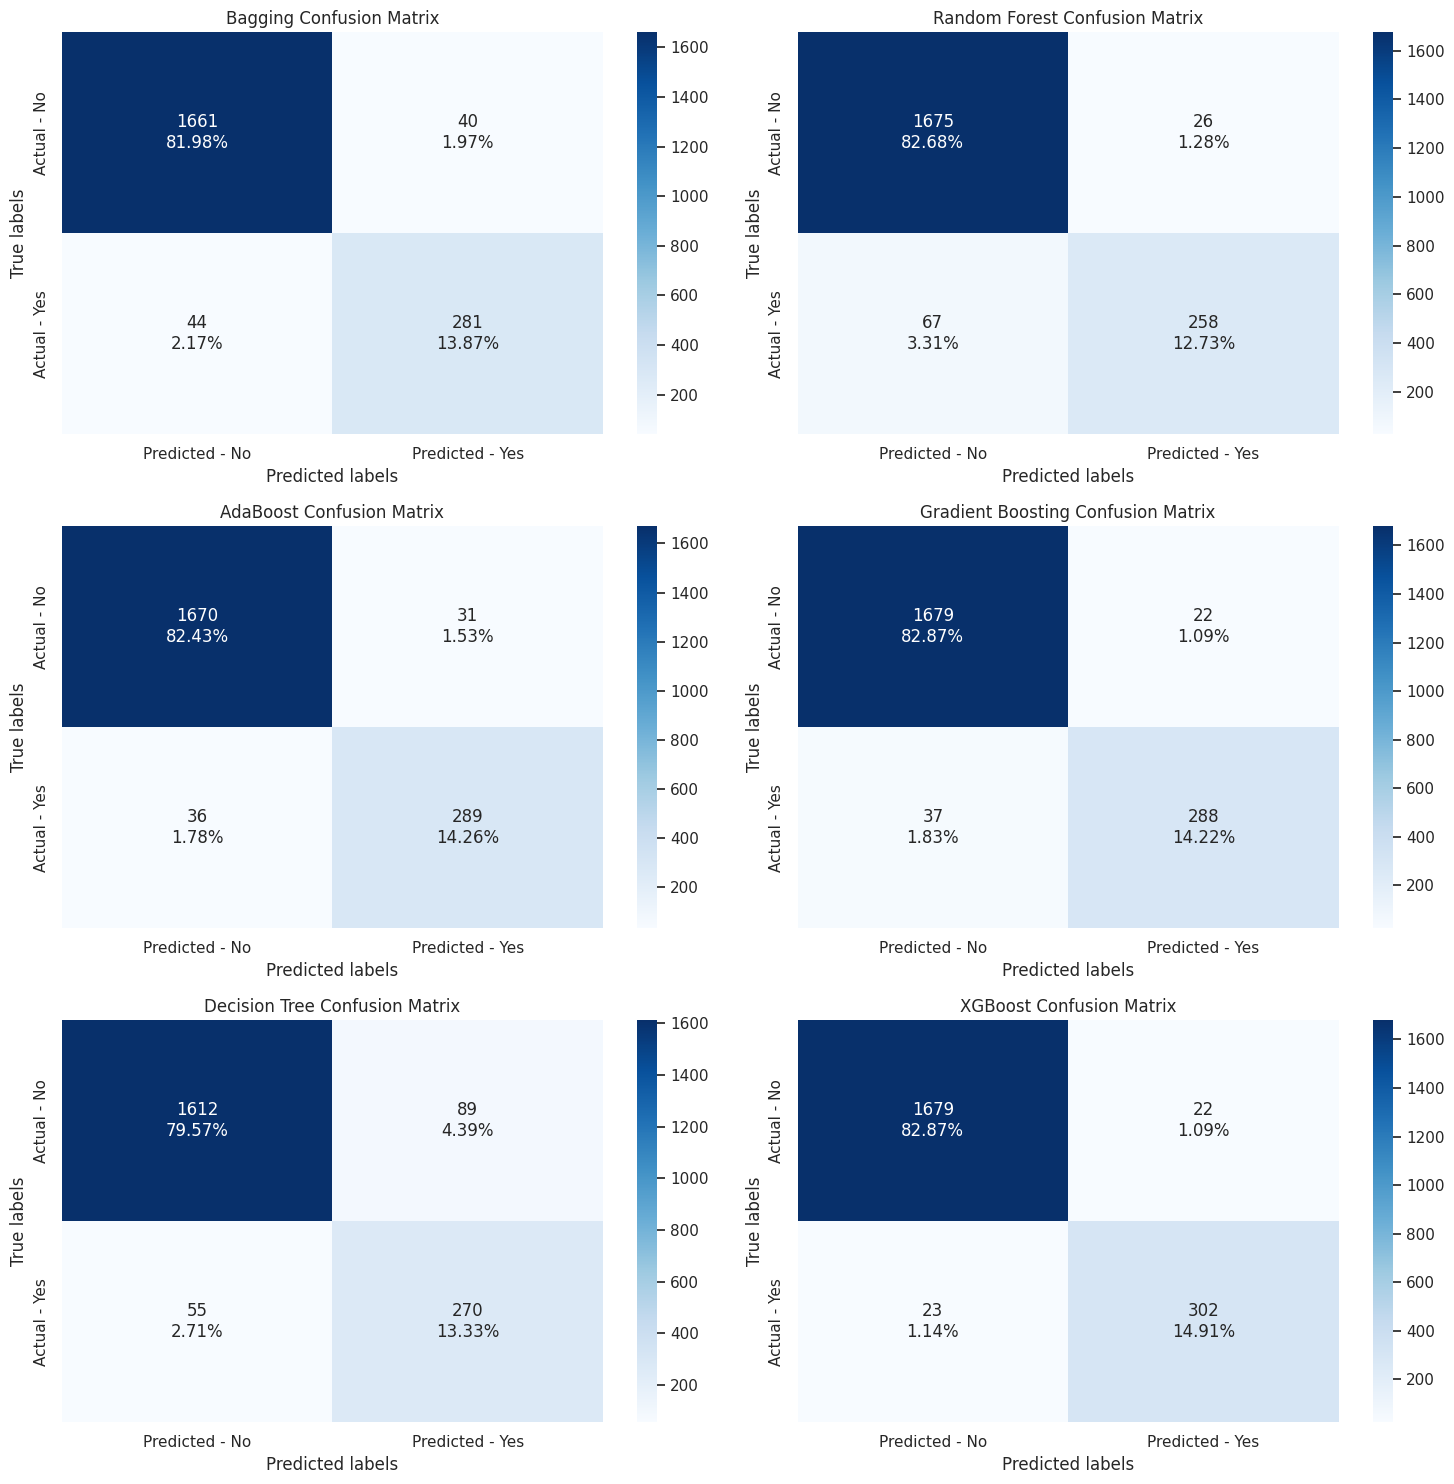

In [ ]:
make_confusion_matrix(models_os, y_test)

### Model Building with Undersampled data


In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))
print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
#Undersampled
models_us = [
    ('Bagging_us', BaggingClassifier(random_state=1)),
    ('RForest_us', RandomForestClassifier(random_state=1)),
    ('AdaBoost_us', AdaBoostClassifier(random_state=1)),
    ('GBM_us', GradientBoostingClassifier(random_state=1)),
    ('DTree_us', DecisionTreeClassifier(random_state=1)),
    ('XGBoost_us', XGBClassifier(random_state=1, eval_metric='logloss'))
]

metrics_df_undersampled = evaluate_models(models_us, X_train_un, y_train_un, X_val, y_val, X_test, y_test)
metrics_df_undersampled



,Model,CV Train Recall,Training Recall,Test Recall,Validation Recall,Recall Diff: Test-Val
5,XGBoost_us,0.96,1.00,0.96,0.97,-0.01
3,GBM_us,0.95,0.98,0.97,0.96,0.01
1,RForest_us,0.94,1.00,0.96,0.94,0.02
2,AdaBoost_us,0.93,0.95,0.96,0.96,-0.00
0,Bagging_us,0.93,0.99,0.95,0.93,0.02
4,DTree_us,0.89,1.00,0.93,0.92,0.01


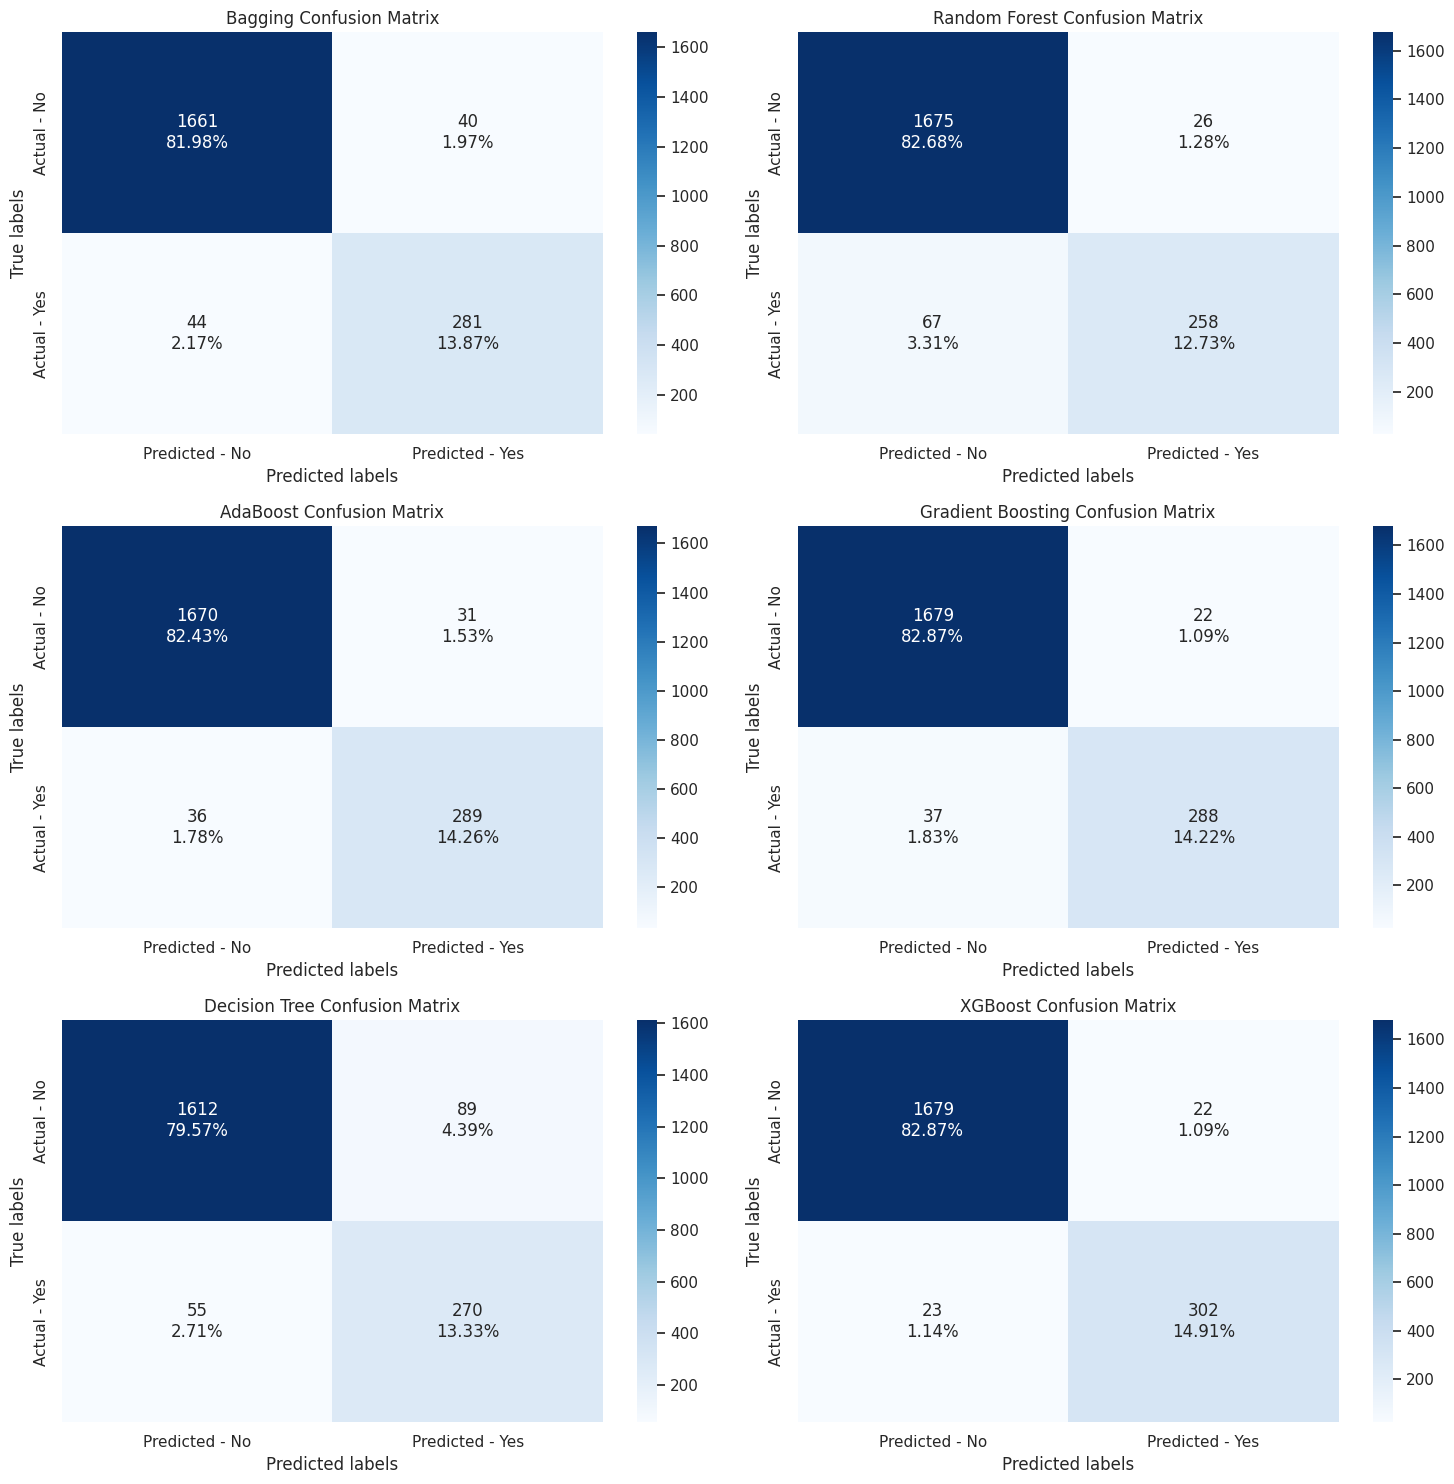

In [ ]:
make_confusion_matrix(models_os, y_test)

### HyperparameterTuning


#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



###**AdaBoost**

#### Tuning AdaBoost using original data

In [ ]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
scorer = metrics.make_scorer(metrics.recall_score)
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8329879644165359:
CPU times: user 3.09 s, sys: 185 ms, total: 3.27 s
Wall time: 54.1 s


In [ ]:
abc_tuned1 = AdaBoostClassifier(
    n_estimators=randomized_cv.best_params_['n_estimators'],
    learning_rate=randomized_cv.best_params_['learning_rate'],
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
abc_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
abc_train1 = model_performance_classification_sklearn(abc_tuned1, X_train, y_train)
abc_train1

,Accuracy,Recall,Precision,F1
0,0.98,0.92,0.96,0.94


In [ ]:
# Checking model's performance on validation set
abc_val1 =  model_performance_classification_sklearn(abc_tuned1, X_val, y_val)
abc_val1

,Accuracy,Recall,Precision,F1
0,0.97,0.86,0.93,0.90


#### Tuning AdaBoost using undersampled data

In [ ]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9457142857142857:
CPU times: user 1.79 s, sys: 72.5 ms, total: 1.86 s
Wall time: 34 s


In [ ]:
abc_tuned2 = AdaBoostClassifier(
    n_estimators=randomized_cv.best_params_['n_estimators'],
    learning_rate=randomized_cv.best_params_['learning_rate'],
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
abc_tuned2.fit(X_train_un, y_train_un)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9457142857142857:


In [ ]:
# Checking model's performance on training set
abc_train2 = model_performance_classification_sklearn(abc_tuned2, X_train_un, y_train_un)
abc_train2

,Accuracy,Recall,Precision,F1
0,0.99,1.00,0.99,0.99


In [ ]:
# Checking model's performance on validation set
abc_val2 =  model_performance_classification_sklearn(abc_tuned2, X_val, y_val)
abc_val2

,Accuracy,Recall,Precision,F1
0,0.94,0.97,0.73,0.83


#### Tuning AdaBoost using oversampled data

In [ ]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9488225672997362:
CPU times: user 6.9 s, sys: 274 ms, total: 7.17 s
Wall time: 2min 2s


In [ ]:
abc_tuned3 = AdaBoostClassifier(
    n_estimators=randomized_cv.best_params_['n_estimators'],
    learning_rate=randomized_cv.best_params_['learning_rate'],
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
abc_tuned3.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
abc_train3 = model_performance_classification_sklearn(abc_tuned3, X_train_over, y_train_over)
abc_train3

,Accuracy,Recall,Precision,F1
0,0.98,0.99,0.98,0.98


In [ ]:
# Checking model's performance on validation set
abc_val3 =  model_performance_classification_sklearn(abc_tuned3, X_val, y_val)
abc_val3

,Accuracy,Recall,Precision,F1
0,0.96,0.90,0.87,0.89


###**Gradient Boosting**

#### Tuning Gradient Boosting using original data


In [ ]:
# for Gradient Boosting
%%time

# defining model
model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)


# parameter grid to pass in RandomizedSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

gb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

gb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_, gb_tuned.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.849361590790162:
CPU times: user 3.17 s, sys: 123 ms, total: 3.29 s
Wall time: 49.9 s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier (
    n_estimators=gb_tuned.best_params_['n_estimators'],
    learning_rate=gb_tuned.best_params_['learning_rate'],
    subsample=gb_tuned.best_params_['subsample'],
    max_features=gb_tuned.best_params_['max_features'],
    init=AdaBoostClassifier(random_state=1),
    random_state=1
)
tuned_gbm1.fit(X_train, y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm1_train


,Accuracy,Recall,Precision,F1
0,0.99,0.95,0.97,0.96


In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val


,Accuracy,Recall,Precision,F1
0,0.97,0.88,0.92,0.90


#### Tuning Gradient Boosting using undersampled data

In [ ]:
# for Gradient Boosting
%%time

# defining model
model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)


# parameter grid to pass in RandomizedSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

gb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

gb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_, gb_tuned.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9559340659340659:
CPU times: user 1.21 s, sys: 53.3 ms, total: 1.27 s
Wall time: 20.8 s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier (
    n_estimators=gb_tuned.best_params_['n_estimators'],
    learning_rate=gb_tuned.best_params_['learning_rate'],
    subsample=gb_tuned.best_params_['subsample'],
    max_features=gb_tuned.best_params_['max_features'],
    init=AdaBoostClassifier(random_state=1),
    random_state=1
)
tuned_gbm2.fit(X_train_un, y_train_un)
print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_, gb_tuned.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9559340659340659:


In [ ]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_un, y_train_un)
gbm2_train

,Accuracy,Recall,Precision,F1
0,1.00,1.00,0.99,1.00


In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.94,0.96,0.76,0.85


#### Tuning Gradient Boosting using over sampled data

In [ ]:
# for Gradient Boosting
%%time

# defining model
model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)


# parameter grid to pass in RandomizedSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

gb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

gb_tuned.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_, gb_tuned.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9472543246935674:
CPU times: user 5.14 s, sys: 256 ms, total: 5.4 s
Wall time: 1min 43s


In [ ]:
tuned_gbm3 = GradientBoostingClassifier(
    n_estimators=gb_tuned.best_params_['n_estimators'],
    learning_rate=gb_tuned.best_params_['learning_rate'],
    subsample=gb_tuned.best_params_['subsample'],
    max_features=gb_tuned.best_params_['max_features'],
    init=AdaBoostClassifier(random_state=1),
    random_state=1
)
tuned_gbm3.fit(X_train_over, y_train_over)
print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_, gb_tuned.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9472543246935674:


In [ ]:
gbm3_train = model_performance_classification_sklearn(tuned_gbm3, X_train_over, y_train_over)
gbm3_train

,Accuracy,Recall,Precision,F1
0,0.99,0.99,0.99,0.99


In [ ]:
gbm3_val = model_performance_classification_sklearn(tuned_gbm3, X_val, y_val)
gbm3_val

,Accuracy,Recall,Precision,F1
0,0.97,0.91,0.88,0.90


###**XGBoost**

#### Tuning XGBoost Model with Original data
**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.
[link text](https://)

In [ ]:
# defining model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
xg_randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
xg_randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xg_randomized_cv.best_params_, xg_randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.921098901098901:


In [ ]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    n_estimators=xg_randomized_cv.best_params_['n_estimators'],
    scale_pos_weight=xg_randomized_cv.best_params_['scale_pos_weight'],
    learning_rate=xg_randomized_cv.best_params_['learning_rate'],
    gamma=xg_randomized_cv.best_params_['gamma'],
    subsample=xg_randomized_cv.best_params_['subsample'],
    eval_metric='logloss'
)

tuned_xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train1 = model_performance_classification_sklearn(tuned_xgb1, X_train, y_train)
xgb_train1

,Accuracy,Recall,Precision,F1
0,0.99,1.00,0.93,0.96


In [ ]:
xgb_val1 = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb_val1

,Accuracy,Recall,Precision,F1
0,0.96,0.94,0.86,0.90


#### Tuning XGBoost Model with undersampled data

In [ ]:
# defining model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
xg_randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
xg_randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xg_randomized_cv.best_params_, xg_randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9785138670852958:


In [ ]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    n_estimators=xg_randomized_cv.best_params_['n_estimators'],
    scale_pos_weight=xg_randomized_cv.best_params_['scale_pos_weight'],
    learning_rate=xg_randomized_cv.best_params_['learning_rate'],
    gamma=xg_randomized_cv.best_params_['gamma'],
    subsample=xg_randomized_cv.best_params_['subsample'],
    eval_metric='logloss'
)

tuned_xgb2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train2 = model_performance_classification_sklearn(tuned_xgb2, X_train_un, y_train_un)
xgb_train2

,Accuracy,Recall,Precision,F1
0,0.96,1.00,0.93,0.96


In [ ]:
xgb_val2 = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb_val2

,Accuracy,Recall,Precision,F1
0,0.89,0.98,0.60,0.74


#### Tuning XGBoost Model with oversampled data

In [ ]:
# defining model
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
xg_randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
xg_randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xg_randomized_cv.best_params_, xg_randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9850980392156863:


In [ ]:
tuned_xgb3 = XGBClassifier(
    random_state=1,
    n_estimators=xg_randomized_cv.best_params_['n_estimators'],
    scale_pos_weight=xg_randomized_cv.best_params_['scale_pos_weight'],
    learning_rate=xg_randomized_cv.best_params_['learning_rate'],
    gamma=xg_randomized_cv.best_params_['gamma'],
    subsample=xg_randomized_cv.best_params_['subsample'],
    eval_metric='logloss'
)
tuned_xgb3.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train3 = model_performance_classification_sklearn(tuned_xgb3, X_train_over, y_train_over)
xgb_train3

,Accuracy,Recall,Precision,F1
0,0.97,1.00,0.94,0.97


In [ ]:
xgb_val3 = model_performance_classification_sklearn(tuned_xgb3, X_val, y_val)
xgb_val3

,Accuracy,Recall,Precision,F1
0,0.93,0.95,0.70,0.81


## Model Comparison and Final Model Selection
**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
  [
    abc_train1.T,
    abc_train2.T,
    abc_train3.T,
    gbm1_train.T,
    gbm2_train.T,
    gbm3_train.T,
    xgb_train1.T,
    xgb_train2.T,
    xgb_train3.T,
  ],
  axis=1,
)

models_train_comp_df.columns = [
    "AdaBoost Original",
    "AdaBoost Undersampled",
    "AdaBoost Oversampled",
    "GBM Original",
    "GBM Undersampled",
    "GBM Oversampled",
    "XGBoost Original",
    "XGBoost Undersampled",
    "XGBoost Oversampled",

]

print("Training performance comparison:")
models_train_comp_df

Validation performance comparison:


,AdaBoost Original,AdaBoost Undersampled,AdaBoost Oversampled,GBM Original,GBM Undersampled,GBM Oversampled,XGBoost Original,XGBoost Undersampled,XGBoost Oversampled
Accuracy,0.98,0.99,0.98,0.99,1.00,0.99,0.99,0.96,0.97
Recall,0.92,1.00,0.99,0.95,1.00,0.99,1.00,1.00,1.00
Precision,0.96,0.99,0.98,0.97,0.99,0.99,0.93,0.93,0.94
F1,0.94,0.99,0.98,0.96,1.00,0.99,0.96,0.96,0.97


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
  [
    abc_val1.T,
    abc_val2.T,
    abc_val3.T,
    gbm1_val.T,
    gbm2_val.T,
    gbm3_val.T,
    xgb_val1.T,
    xgb_val2.T,
    xgb_val3.T,
  ],
  axis=1,
)

models_val_comp_df.columns = [
    "AdaBoost Original",
    "AdaBoost Undersampled",
    "AdaBoost Oversampled",
    "GBM Original",
    "GBM Undersampled",
    "GBM Oversampled",
    "XGBoost Original",
    "XGBoost Undersampled",
    "XGBoost Oversampled",
]

print("Validation performance comparison:")
models_val_comp_df



,AdaBoost Original,AdaBoost Undersampled,AdaBoost Oversampled,GBM Original,GBM Undersampled,GBM Oversampled,XGBoost Original,XGBoost Undersampled,XGBoost Oversampled
Accuracy,0.97,0.94,0.96,0.97,0.94,0.97,0.96,0.89,0.93
Recall,0.86,0.97,0.90,0.88,0.96,0.91,0.94,0.98,0.95
Precision,0.93,0.73,0.87,0.92,0.76,0.88,0.86,0.60,0.70
F1,0.90,0.83,0.89,0.90,0.85,0.90,0.90,0.74,0.81


Observations

- AdaBoost Original has high scores across the board with a slightly lower Recall compared to its tuned over and under sampled models.

- GBM Original has high Accuracy and F1 scores and is consistent in Recall and Precision each original and tuned.

- XGBoost Original also has high Accuracy and F1, with a noticeable drop in Precision on the undersampled dataset.

Because all are very similiar in metrics and if we productionalize the model, XGBoost wopuld be the most performant and robust. A trade off between lower maintenance and performace for slight lower precision.


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
XGBoost_og_test = model_performance_classification_sklearn(tuned_xgb1, X_test, y_test)
XGBoost_og_test

,Accuracy,Recall,Precision,F1
0,0.97,0.95,0.87,0.91


### Feature Importances

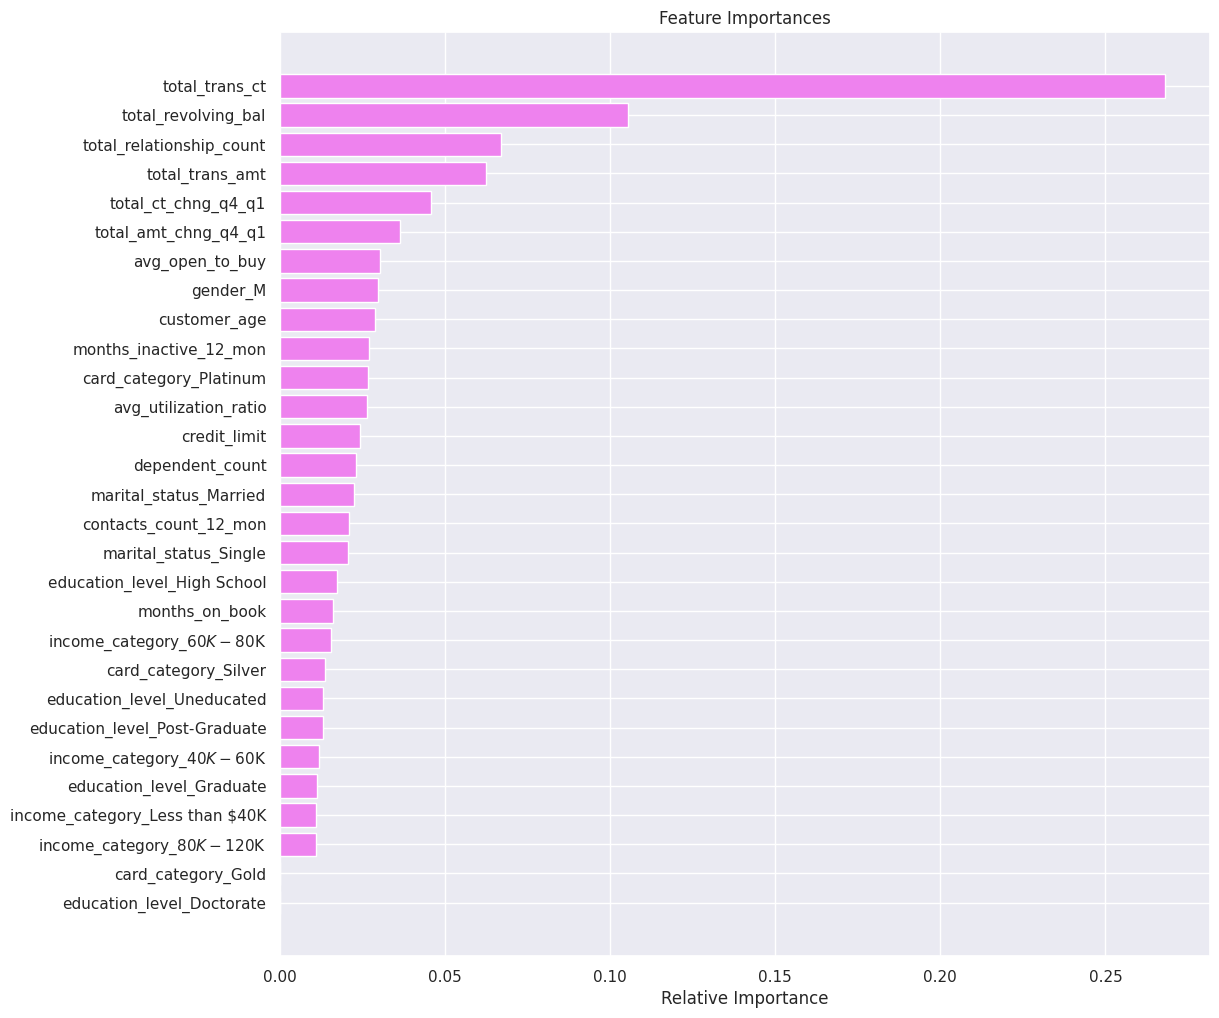

In [ ]:
feature_names = X_train.columns
importances = (
    tuned_xgb1.feature_importances_
)

indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Business Insights and Conclusions


---


1. Customer Engagement and Spend Initiatives: Implementing cashback offers, 0% interest rate promotions, reward point promotions, partnering with popular brands in area where customers are clustered or through online merchants, etc This focuses on boosting customer engagement by incentivizing higher credit card spend while providing a way for customers to manage payments, earn cash back or points, and possibly hook them into carrying a balance month to month more frequently.

2. Target customer segments with higher rates of attrition. Focusing on customers with lower transaction counts and amounts, particularly those spending less than 2k or having less than 600 in revolving balance, this aims to retain individuals at higher risk of churning.

3. Enhance customer stickiness and reduce attrition by encouraging customers, especially those holding fewer than three products with the bank, to try other products the bank offers.

4. Offer promotional credit limit increases around the holidays Q4. This strategy could boost credit card spending and transaction amounts while leading to revolving balances as the customrs load up for the holidays.

5. Tailoring offers to specific demographics, such as graduates. This can potentially increase card usage and retention.

6. Leverage predictive modeling to identify high-risk customers for proactive engagement, and customizing credit card offers based on critical features like Total Transaction Count and Amount, which could significantly impact retention efforts.

7. There are higher rates of attrition around the 1 month mark of customner in-activity. Target these customers with offers, contact via pohone, or find any good reason to contact them.


